In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#from sklearn.preprocessing import scale 
#from sklearn import model_selection
#from sklearn import metrics
#from sklearn import model_selection
#from sklearn import datasets 
#from sklearn.neural_network import MLPClassifier 
#plt.style.use('ggplot')
#from sklearn.model_selection import GridSearchCV

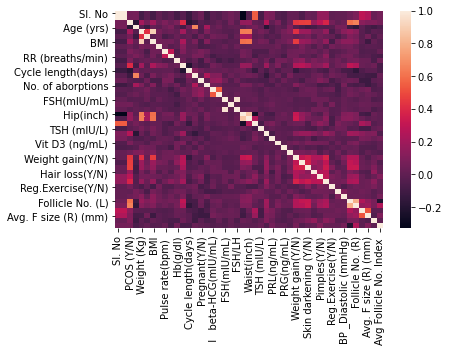

In [2]:
data_full = pd.read_csv('/Users/aminasaleh/Downloads/PCOS_data_without_infertilityV2.csv')

dataFile_hm = sns.heatmap(data_full.corr(), annot = False)

In [3]:
data_full = data_full.dropna()

data_full = data_full.drop('Sl. No', axis = 1)
data_full = data_full.drop('Patient File No.', axis = 1)
data_full = data_full.drop('Follicle No. (L)', axis = 1)
data_full = data_full.drop('Follicle No. (R)', axis = 1)

x = data_full.drop(columns = ['Avg Follicle No. Index ']).copy()
y = data_full ['Avg Follicle No. Index ']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)


In [4]:
sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(x_train, y_train)


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)

In [6]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

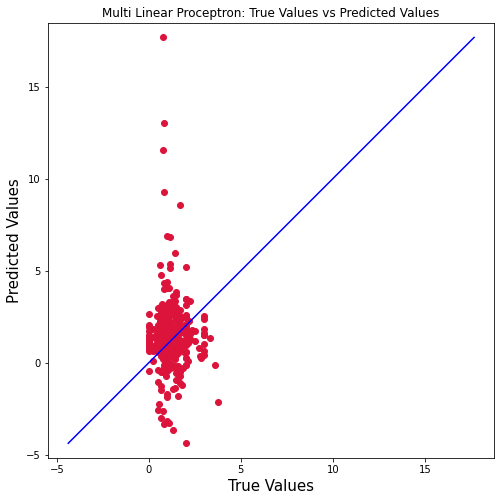

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, y_train_prediction, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_train_prediction), max(y_train))
p2 = min(min(y_train_prediction), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Multi Linear Proceptron: True Values vs Predicted Values")
plt.axis('equal')
plt.show()


In [8]:
r2_train = r2_score(y_train, y_train_prediction)
print("R^2 Training: ", r2_train)
r2_test = r2_score(y_test, y_test_prediction)
print("R^2 Testing: ", r2_test)
mse_train = mean_squared_error(y_train, y_train_prediction)
print(f'MSE Training: {mse_train}')
mse_test = mean_squared_error(y_test, y_test_prediction)
print(f'MSE Testing: {mse_test}')

R^2 Training:  -24.535898327103343
R^2 Testing:  -10.680869390458083
MSE Training: 9.316372789771213
MSE Testing: 5.8346894455753056
